In [1]:
import numpy as np
from scipy.ndimage import distance_transform_edt
import matplotlib.pyplot as plt
from matplotlib import cm
import sys, os
import os.path as osp

root = osp.abspath(osp.join(os.getcwd(), '..'))
sys.path.insert(0, root)

from vlkit.geometry import bwdist, batch_bwdist, seg2edge
import vlkit
import vlkit.plt as vlplt

## Distance Transform

In [2]:
im = np.zeros((100, 100), dtype=bool)
im[49,range(50)] = 1
im[range(0, 50), 49] = 1
im[range(50, 100), range(50, 100)] = 1
h, w = im.shape

In [3]:
dist, inds, field = bwdist(im)

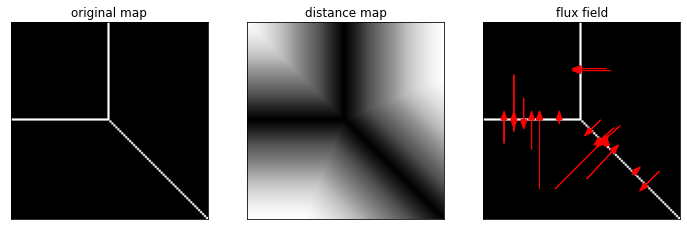

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
vlplt.clear_ticks(axes)

axes[0].imshow(im, cmap=cm.Greys_r)
axes[0].set_title("original map")

axes[1].imshow(dist, cmap=cm.Greys_r)
axes[1].set_title("distance map")

axes[2].imshow(im, cmap=cm.Greys_r)
axes[2].set_title("flux field")
for i in range(20):
    x = np.random.choice(np.arange(10, w-10), 1).item()
    y = np.random.choice(np.arange(10, h-10), 1).item()
    axes[2].arrow(x, y, field[1, y, x], field[0, y, x], head_width=3, color='red')
plt.savefig(osp.join(root, 'docs/source/_static/distance_transform.svg'))

In [5]:
im_batch = np.concatenate((im[None, :, :], im[None, :, :]), axis=0)
dist, inds, field = batch_bwdist(im_batch)

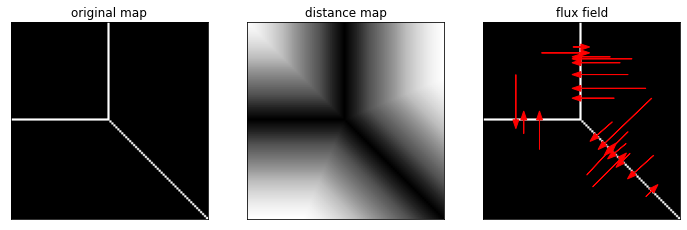

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
vlplt.clear_ticks(axes)

axes[0].imshow(im_batch[0,], cmap=cm.Greys_r)
axes[0].set_title("original map")

axes[1].imshow(dist[0,], cmap=cm.Greys_r)
axes[1].set_title("distance map")

axes[2].imshow(im_batch[0,], cmap=cm.Greys_r)
axes[2].set_title("flux field")
for i in range(20):
    x = np.random.choice(np.arange(10, w-10), 1).item()
    y = np.random.choice(np.arange(10, h-10), 1).item()
    axes[2].arrow(x, y, field[0, 1, y, x], field[0, 0, y, x], head_width=3, color='red')

## Segmentation $\rightarrow$ Edge $\rightarrow$ Distance transform

In [7]:
im = np.zeros((3, 100, 100), dtype=np.uint8)
im[:, :50,] = 255
im[:, 50:, 50:] = 128
edge = seg2edge(im, thin=True)
dist, inds, field = batch_bwdist(edge)

Text(0.5, 1.0, 'dist map')

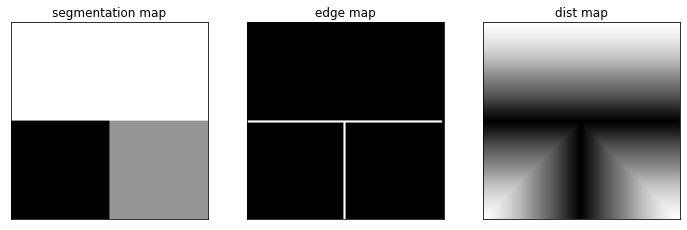

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
vlplt.clear_ticks(axes)

axes[0].imshow(im[0,], cmap=cm.Greys_r)
axes[0].set_title("segmentation map")

axes[1].imshow(edge[0,], cmap=cm.Greys_r)
axes[1].set_title("edge map")

axes[2].imshow(dist[0,], cmap=cm.Greys_r)
axes[2].set_title("dist map")